In [39]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("olcaybolat1/dermatology-dataset-classification")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/olcaybolat1/dermatology-dataset-classification/versions/5


**Q1. From the above data split the data into train and test and train SVM, RF find the result?**


In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [41]:
# Assuming your dataset is a CSV file named 'dermatology.csv' within the downloaded path
data = pd.read_csv(path + '/dermatology_database_1.csv')

In [42]:
# Assuming your dataset is a CSV file named 'dermatology.csv' within the downloaded path
data = pd.read_csv(path + '/dermatology_database_1.csv')
# Display the first few rows of the DataFrame
data.head() # Change df to data

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_granular_layer,vacuolisation_damage_basal_layer,spongiosis,saw_tooth_appearance_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_mononuclear_infiltrate,band_like_infiltrate,age,class
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45,3


In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   erythema                             366 non-null    int64 
 1   scaling                              366 non-null    int64 
 2   definite_borders                     366 non-null    int64 
 3   itching                              366 non-null    int64 
 4   koebner_phenomenon                   366 non-null    int64 
 5   polygonal_papules                    366 non-null    int64 
 6   follicular_papules                   366 non-null    int64 
 7   oral_mucosal_involvement             366 non-null    int64 
 8   knee_and_elbow_involvement           366 non-null    int64 
 9   scalp_involvement                    366 non-null    int64 
 10  family_history                       366 non-null    int64 
 11  melanin_incontinence                 366 non-

In [44]:
X = data.drop('class', axis=1)  # Assuming 'class' is the target column
y = data['class']

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # 80% train, 20% test

In [46]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Assuming your dataset is a CSV file named 'dermatology.csv' within the downloaded path
data = pd.read_csv(path + '/dermatology_database_1.csv', na_values=['?']) # Tell pandas to treat '?' as NaN

# Now you can handle missing values (NaN) as needed:
# 1. Drop rows with missing values:
data.dropna(inplace=True)
# 2. Impute missing values with the mean, median, or a constant:
# data.fillna(data.mean(), inplace=True)  # Replace with mean of each column


X = data.drop('class', axis=1)  # Assuming 'class' is the target column
y = data['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # 80% train, 20% test

svm_model = SVC(kernel='linear')  # You can choose different kernels
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)

In [47]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust hyperparameters
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [48]:
svm_predictions = svm_model.predict(X_test)
rf_predictions = rf_model.predict(X_test)

svm_accuracy = accuracy_score(y_test, svm_predictions)
rf_accuracy = accuracy_score(y_test, rf_predictions)

print("SVM Accuracy:", svm_accuracy)
print("Random Forest Accuracy:", rf_accuracy)

SVM Accuracy: 0.9722222222222222
Random Forest Accuracy: 0.9861111111111112


**Q2. Find the outliers, remove the outliers and again train SVM, RF find the results.**

In [49]:
from sklearn.ensemble import IsolationForest

# Create an IsolationForest model
iso_forest = IsolationForest(contamination=0.05)  # Adjust contamination as needed

# Fit the model to your data
iso_forest.fit(X_train)  # Only fit on training data

# Get outlier predictions
outlier_predictions = iso_forest.predict(X_train)

# Remove outliers from training data
X_train_no_outliers = X_train[outlier_predictions == 1]
y_train_no_outliers = y_train[outlier_predictions == 1]

In [50]:
# Retrain SVM model
svm_model.fit(X_train_no_outliers, y_train_no_outliers)

# Retrain Random Forest model
rf_model.fit(X_train_no_outliers, y_train_no_outliers)

RandomForestClassifier(random_state=42)

In [51]:
svm_predictions = svm_model.predict(X_test)  # Predict on the original test set
rf_predictions = rf_model.predict(X_test)

svm_accuracy = accuracy_score(y_test, svm_predictions)
rf_accuracy = accuracy_score(y_test, rf_predictions)

print("SVM Accuracy (after outlier removal):", svm_accuracy)
print("Random Forest Accuracy (after outlier removal):", rf_accuracy)

SVM Accuracy (after outlier removal): 0.9722222222222222
Random Forest Accuracy (after outlier removal): 0.9722222222222222


**Q3. Plot histograms for each column of above data.**


In [52]:
import pandas as pd
import matplotlib.pyplot as plt

In [53]:
# Assuming you have already loaded the dataset into the 'data' variable
# If not, load it using:
data = pd.read_csv(path + '/dermatology_database_1.csv')

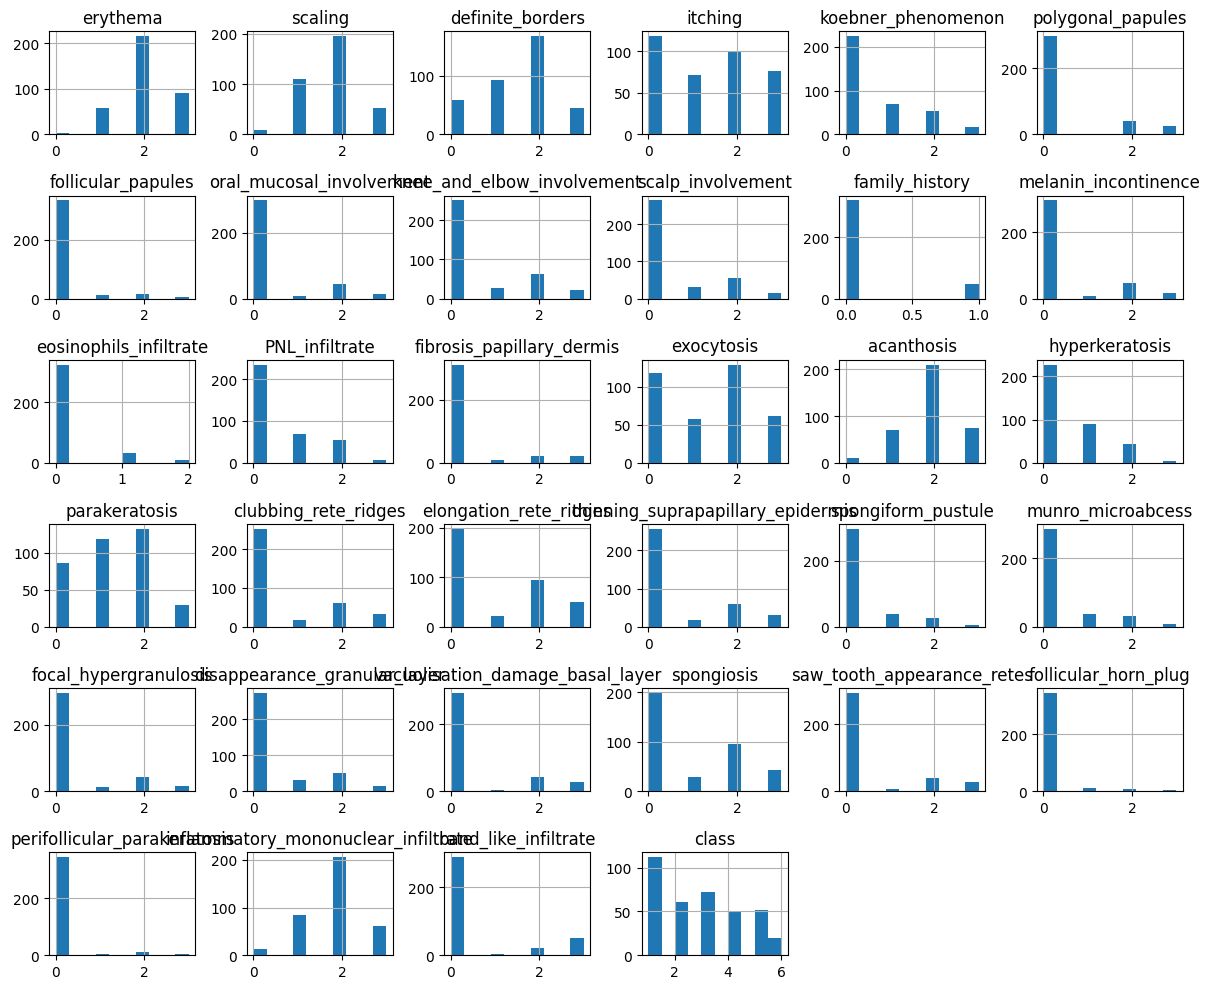

In [54]:
data.hist(figsize=(12, 10))  # Adjust figsize as needed
plt.tight_layout()  # To prevent overlapping of plots
plt.show()

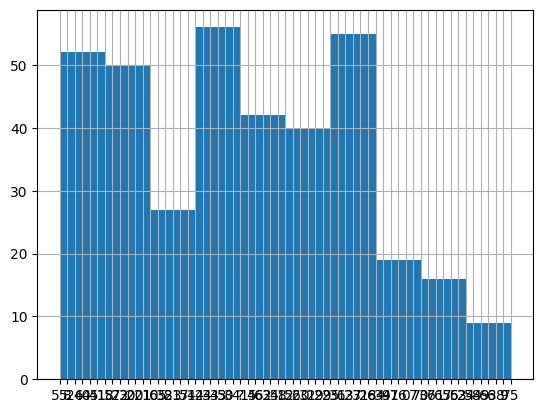

In [55]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have already loaded the dataset into the 'data' variable
# If not, load it using:
data = pd.read_csv(path + '/dermatology_database_1.csv')

# Replace 'actual_column_name' with the name of a column in your dataset
data['age'].hist()  # Example: Creating a histogram for the 'age' column
plt.show()